In [2]:
import pandas as pd
import math
import numpy as np
import scipy as scp
import scipy.stats as scs
import scipy.constants as scc
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
# data_energy = pd.read_csv('data/energy.csv', header=None)
# data_kinetic = pd.read_csv('data/kinetic.csv', header=None)
# data_poten = pd.read_csv('data/poten.csv', header=None)
# data_temp = pd.read_csv('data/temp.csv', header=None)
# data_velocity = pd.read_csv('data/velocity.csv', header=None)
# data_init_velocity = pd.read_csv('data/init_velocity.csv', header=None)
# data_init_velocity_nosq = pd.read_csv('data/init_velocity_nosq.csv', header=None)

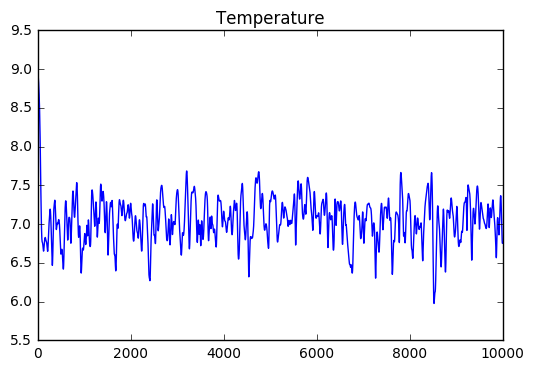

Средняя Температура: 7.062212934
Дисперсия: 0.0869781979102


In [17]:
data_energy = pd.read_csv('data/energy.csv', header=None)
data_kinetic = pd.read_csv('data/kinetic.csv', header=None)
data_poten = pd.read_csv('data/poten.csv', header=None)
data_temp = pd.read_csv('data/temp.csv', header=None)
data_velocity = pd.read_csv('data/velocity.csv', header=None)
data_init_velocity = pd.read_csv('data/init_velocity.csv', header=None)
data_init_velocity_nosq = pd.read_csv('data/init_velocity_nosq.csv', header=None)

temps = data_temp[0]
plt.plot(temps)
plt.title('Temperature')
plt.show()
avg_temp = np.mean(temps)
var_temp = np.var(temps)
print('Средняя Температура:', avg_temp)
print('Дисперсия:', var_temp)

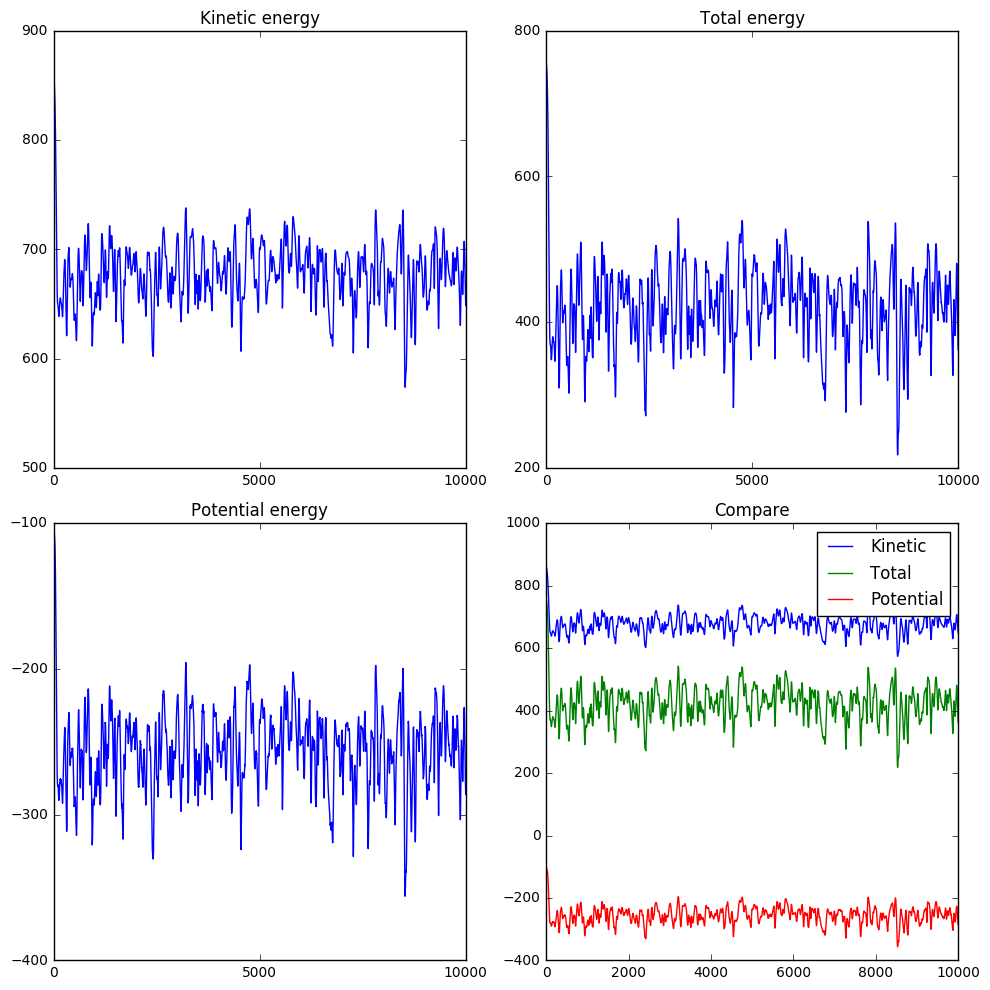

In [18]:
def myplot(ax, data, mytitle):
    ax.locator_params(nbins=4)
    ax.plot(data)
    ax.set_title(mytitle)

plt.close('all')
fig = plt.figure(figsize=(10,10))

ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

myplot(ax1, data_kinetic[0], 'Kinetic energy')
myplot(ax2, data_energy[0], 'Total energy')
myplot(ax3, data_poten[0], 'Potential energy')

ax4.plot(data_kinetic[0], label='Kinetic')
ax4.plot(data_energy[0], label='Total')
ax4.plot(data_poten[0], label='Potential')
ax4.legend()
ax4.set_title('Compare')

plt.tight_layout()

Максвелловское распределение скоростей, полагаем $k=1$

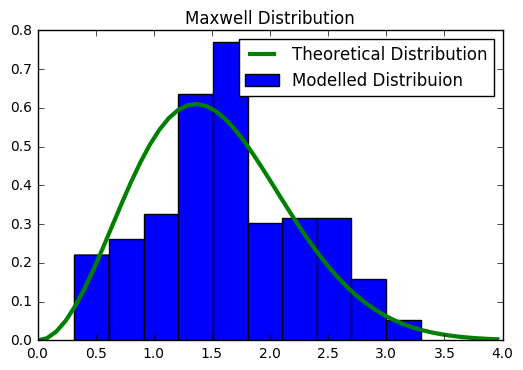

In [8]:
def maxwell_distribution(vels, temp, mass=1):
    def probability(vel):
        return 4 * math.pi * (vel**2) * \
               (mass/(2 * math.pi * temp)**(3/2)) * \
                np.exp((-mass * (vel**2))/(2 * temp))
        
    if hasattr(vels, '__iter__'):
        return [probability(vel) for vel in vels]
    else:
        return probability(vels)

    
plt.hist(data_velocity[0], normed=True, label='Modelled Distribuion')
x = np.linspace(0,max(data_velocity[0])*1.2)
plt.plot(x, maxwell_distribution(x, temp=avg_temp), linewidth=3,\
                                label='Theoretical Distribution')
plt.title('Maxwell Distribution')
plt.legend()
plt.show()

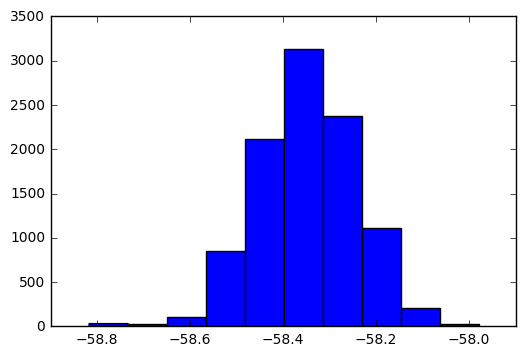

-58.3485970292
-0.183193470419 percent


In [9]:
plt.hist(data_energy[0])
plt.show()
print(np.mean(data_energy[0]))
print(100 * math.sqrt(np.var(data_energy[0]))/np.mean(data_energy[0]), 'percent')

In [ ]:
varss = []
for i in range(len(data_temp[0])):
    varss.append(np.var(data_temp[0][:i]))
    
plt.plot(varss)
plt.show()